# System of Record (SOR) :

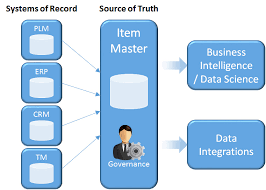

-SOR is information storage and retrieval system

-In SOR, we Log Data Storage in a generalized format

# Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import json

# Reading Logs file that needs to be converted into SOR
We are reading the aleo log data into a dataframe so that we can pre-process the data and then convert into the required sor format

In [23]:
data=pd.read_excel(r'./aleo_log_data_final.xlsx')
data

,Id,Date,Type Of Transaction,Transaction Amount,From Ip Address,To Ip Address,Log,adress,amount,addressTo,amountTo
0,1,2022-12-23,Account Creation,NaN,112.203.228.24,Nan,Private Key: APrivateKey1zkp3Btxe1juMtCn1oprM...,aleo1ekualfc4ksmx6r23xfwsey7de8m3ukceqxmeg6uca...,Nan,Nan,Nan
1,2,2022-12-23,Account Creation,NaN,189.48.136.104,Nan,Private Key: APrivateKey1zkp5o8ynBmeUvr5ZbQvBx...,NaN,NaN,NaN,NaN
2,3,2022-12-23,Account Creation,NaN,238.113.30.249,Nan,Private Key: APrivateKey1zkp3XYtGFNf1PW6YhorD...,NaN,NaN,NaN,NaN
3,4,2022-12-23,Account Creation,NaN,222.192.120.242,Nan,Private Key: APrivateKey1zkpFUs9ywN9US73cUeci...,NaN,NaN,NaN,NaN
4,5,2022-12-23,Account Creation,NaN,51.172.116.204,Nan,Private Key: APrivateKey1zkp2ocxA6bsLuMigFF6o...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
136,137,2022-12-27,Withdraw,35.0,74.192.219.37,Nan,{\n owner: aleo1jwn97we6st6g8dwn8mhc28m3q8ay8...,NaN,NaN,NaN,NaN
137,138,2022-12-27,Withdraw,145.0,42.197.28.254,Nan,{\n owner: aleo1y6nzv44dk9wqsx65nt70yw3j2fpg5...,NaN,NaN,NaN,NaN
138,139,2022-12-27,Withdraw,20.0,74.85.35.11,Nan,{\n owner: aleo1sgyks5ua7gddfjgrdad4vmk0ws52q...,NaN,NaN,NaN,NaN
139,140,2022-12-27,Withdraw,60.0,250.255.107.154,Nan,{\n owner: aleo1a8jexwuvy3vwvh960vaypckfucchj...,NaN,NaN,NaN,NaN


# Cleansing data
### In the above data we can see that some new line characters ie '\n' have crept in the log format. So we are removing the unnecessary new line characters

In [27]:
data=data.replace('\n',' ',regex=True)
data

,Id,Date,Type Of Transaction,Transaction Amount,From Ip Address,To Ip Address,Log,adress,amount,addressTo,amountTo
0,1,2022-12-23,Account Creation,NaN,112.203.228.24,Nan,Private Key: APrivateKey1zkp3Btxe1juMtCn1oprM...,aleo1ekualfc4ksmx6r23xfwsey7de8m3ukceqxmeg6uca...,Nan,Nan,Nan
1,2,2022-12-23,Account Creation,NaN,189.48.136.104,Nan,Private Key: APrivateKey1zkp5o8ynBmeUvr5ZbQvBx...,NaN,NaN,NaN,NaN
2,3,2022-12-23,Account Creation,NaN,238.113.30.249,Nan,Private Key: APrivateKey1zkp3XYtGFNf1PW6YhorD...,NaN,NaN,NaN,NaN
3,4,2022-12-23,Account Creation,NaN,222.192.120.242,Nan,Private Key: APrivateKey1zkpFUs9ywN9US73cUeci...,NaN,NaN,NaN,NaN
4,5,2022-12-23,Account Creation,NaN,51.172.116.204,Nan,Private Key: APrivateKey1zkp2ocxA6bsLuMigFF6o...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
136,137,2022-12-27,Withdraw,35.0,74.192.219.37,Nan,{ owner: aleo1jwn97we6st6g8dwn8mhc28m3q8ay8v...,NaN,NaN,NaN,NaN
137,138,2022-12-27,Withdraw,145.0,42.197.28.254,Nan,{ owner: aleo1y6nzv44dk9wqsx65nt70yw3j2fpg5d...,NaN,NaN,NaN,NaN
138,139,2022-12-27,Withdraw,20.0,74.85.35.11,Nan,{ owner: aleo1sgyks5ua7gddfjgrdad4vmk0ws52qc...,NaN,NaN,NaN,NaN
139,140,2022-12-27,Withdraw,60.0,250.255.107.154,Nan,{ owner: aleo1a8jexwuvy3vwvh960vaypckfucchj2...,NaN,NaN,NaN,NaN


# Process to convert data into SOR
### Log column format is different for different types like Account Creation, Deposit, Withdraw and Transfer. So, we are processing all the log data based on its transaction type

In [28]:
import re
sor_list=[]
df_group = data.groupby('Type Of Transaction')
for typ,df_type in df_group:
#     df_type
    if typ == 'Account Creation':
        for idx in df_type.index:
            log = df_type.loc[idx,'Log'].split(':')
#             print(log)
            sor_list.append([df_type.loc[idx,'Date'],typ,df_type.loc[idx,'Transaction Amount'],df_type.loc[idx,'From Ip Address'],log[-1].strip(),'','','',''])
    elif typ == 'Deposit' or typ == 'Withdraw ':
        if typ == 'Withdraw ':
            typ = 'Withdraw'
        for idx in df_type.index:
            log = re.findall(r'{(.*?)}',df_type.loc[idx,'Log'])
            l1 = dict((x.strip(), y.strip())
                     for x, y in (element.split(':') 
                     for element in log[0].split(', ')))
            address = l1['owner'].split('.')[0]
            amount = l1['amount'].split('u')[0]
            sor_list.append([df_type.loc[idx,'Date'],typ,df_type.loc[idx,'Transaction Amount'],df_type.loc[idx,'From Ip Address'],address,amount,'','',''])
    elif typ == 'Transfer':
        for idx in df_type.index:
            log = re.findall(r'{(.*?)}',df_type.loc[idx,'Log'])
#             print(log)
            l1 = dict((x.strip(), y.strip())
                     for x, y in (element.split(':') 
                     for element in log[0].split(', ')))
            address1 = l1['owner'].split('.')[0]
            amount1 = l1['amount'].split('u')[0]
            
            l2 = dict((x.strip(), y.strip())
                     for x, y in (element.split(':') 
                     for element in log[1].split(', ')))
            address2 = l2['owner'].split('.')[0]
            amount2 = l2['amount'].split('u')[0]
#             print(address1+" "+amount1)
            sor_list.append([df_type.loc[idx,'Date'],typ,df_type.loc[idx,'Transaction Amount'],df_type.loc[idx,'From Ip Address'],address1,amount1,df_type.loc[idx,'To Ip Address'],address2,amount2])
# print(sor_list)
df_sor = pd.DataFrame(sor_list, columns=['Date','Type','TransactionAmount','IpSource','AddressSource','BalanceSource','IpDestination','AddressDestination',"BalanceDestination"])
display(df_sor)
df_sor.to_csv('System_of_Record_SOR.csv',index=False)

,Date,Type,TransactionAmount,IpSource,AddressSource,BalanceSource,IpDestination,AddressDestination,BalanceDestination
0,2022-12-23,Account Creation,NaN,112.203.228.24,aleo1ekualfc4ksmx6r23xfwsey7de8m3ukceqxmeg6uca...,,,,
1,2022-12-23,Account Creation,NaN,189.48.136.104,aleo1q865tp9vryfrcytzfgxdzy32wy04m6hq374xfxr7d...,,,,
2,2022-12-23,Account Creation,NaN,238.113.30.249,aleo1x6umtzdzjssx8t89xhpj2cev35cv93s4h2ms9608l...,,,,
3,2022-12-23,Account Creation,NaN,222.192.120.242,aleo1022vme7y4d55fznml40wq8l7r8ghc5q8593dg4r3c...,,,,
4,2022-12-23,Account Creation,NaN,51.172.116.204,aleo1awxrtukerqph56ejlsv4lmvr4dwz7fyz2xnmk80h7...,,,,
...,...,...,...,...,...,...,...,...,...
136,2022-12-27,Withdraw,35.0,74.192.219.37,aleo1jwn97we6st6g8dwn8mhc28m3q8ay8v5udda2y4nxj...,5,,,
137,2022-12-27,Withdraw,145.0,42.197.28.254,aleo1y6nzv44dk9wqsx65nt70yw3j2fpg5dfyxwwn9gt4d...,45,,,
138,2022-12-27,Withdraw,20.0,74.85.35.11,aleo1sgyks5ua7gddfjgrdad4vmk0ws52qc74qertng0fl...,15,,,
139,2022-12-27,Withdraw,60.0,250.255.107.154,aleo1a8jexwuvy3vwvh960vaypckfucchj288gsxvessml...,30,,,
